<a href="https://www.kaggle.com/code/werakaggle/ml-spam-filters?scriptVersionId=119679645" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <center>Comparison of the performances of machine learning-based email spam detectors</center>
### <center>Algorithms used: **Support Vector Machine, Logistic Regression, Gaussian Naive Bayes and Random Forest**</center>
## <center>📧🤖📧🚀📧🤖📧</center>
***
### In this report the whole process can be summarised in the following 6 steps:
#### 1. Import the necessary dependencies 
#### 2. Upload and/or choose your dataset and read the csv file into `raw_mail_data` variable
#### 3. Preprocess data
#### 4. Split data into training set (80%) and testing set (20%)
#### 5. Extract features
#### 6. Train the models (classififers) and test each model (classifier) and calculate accuracy
##### 
***

#### 1. Import the necessary dependencies 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # splitting our data for test and train sub-sets

# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# performance metrics:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
import joblib
from scikitplot.metrics import plot_roc

#and the algorithms
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#### 2. Upload and/or choose your dataset and read the csv file into 'raw_mail_data' variable

In [2]:
# check what datasets you made available for this notebook
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# loading the data from csv  file into a pandas dataframe
raw_mail_data = pd.read_csv('/kaggle/input/mail-datacsv/mail_data.csv')
# raw_mail_data2 = pd.read_csv('/kaggle/input/emails-dataset/spam.csv')
# print(raw_mail_data)
# print(raw_mail_data2)
raw_mail_data.shape #check number of raws and lines

/kaggle/input/mail-datacsv/mail_data.csv
/kaggle/input/emails-dataset/spam.csv


(5572, 2)

#### 3. Preprocess data

In [3]:
#replace null values with an empty string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')
#check for and remove duplicates
mail_data.drop_duplicates(inplace = True)
#show the new shape
mail_data.shape
#check the data
mail_data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
# stemming!!!!

#  separating the data as text and label
X_pre_stemmed = mail_data['Message']
ps = PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(ps.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

X = []
for message in X_pre_stemmed:
    X.append(stemSentence(message))
    
print(X[0])

#check number of rowa and columns
mail_data.shape
mail_data.head(10)

go until jurong point , crazi .. avail onli in bugi n great world la e buffet ... cine there got amor wat ... 


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


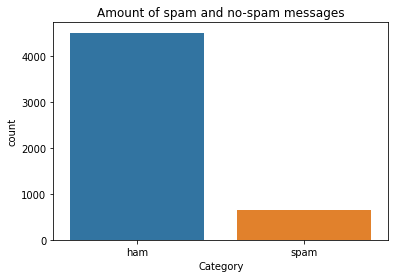

In [5]:
sns.countplot(data = mail_data, x= mail_data["Category"]).set_title("Amount of spam and no-spam messages")
plt.show()

In [6]:
# Label ecoding

# label spam mail as 0 and ham as 1
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

#check how it looks now
mail_data.head(10)

Y = mail_data['Category']
print(Y[0])

1


#### 4. Split data into training set (80%) and testing set (20%)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

#### 5. Extract features

In [8]:
# transform the text data to feature vectors that can be used as input to the logistic regression model

feature_extraction = TfidfVectorizer(min_df=1, stop_words = 'english', lowercase = 'True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
print(X_train_features)

# convert Y_train and Y_test values into integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


  (0, 5764)	0.48303813512243965
  (0, 5688)	0.4898673616987752
  (0, 1192)	0.5538832733861689
  (0, 2145)	0.4689535663823655
  (1, 1476)	0.4383846818357972
  (1, 5069)	0.5806590278203481
  (1, 5595)	0.5806590278203481
  (1, 921)	0.3653615436156127
  (2, 300)	0.17016968561251924
  (2, 790)	0.21776929830346684
  (2, 5888)	0.25861483959285614
  (2, 4428)	0.2425560214892859
  (2, 6332)	0.22778052386559436
  (2, 682)	0.2425560214892859
  (2, 25)	0.25861483959285614
  (2, 2291)	0.20599006549047982
  (2, 791)	0.25861483959285614
  (2, 3842)	0.25861483959285614
  (2, 3949)	0.25861483959285614
  (2, 3948)	0.25861483959285614
  (2, 3574)	0.26760165470345915
  (2, 5881)	0.1439855329785738
  (2, 2869)	0.18839743166743975
  (2, 3254)	0.18839743166743975
  (2, 3577)	0.22407778019477437
  :	:
  (4120, 1169)	0.6761566626001224
  (4120, 2815)	0.4955601983338525
  (4120, 3449)	0.4246238466470748
  (4120, 1896)	0.34194567742174814
  (4121, 5155)	0.47272803033933686
  (4121, 5425)	0.47272803033933686
  (4

#### 6. Train the models (classififers) and test each model (classifier) and calculate accuracy

#### <b>SVM</b>

In [9]:
modelSvm = svm.SVC()
modelSvm.fit(X_train_features,Y_train)

# prediction on training data
prediction_on_training_dataSvm = modelSvm.predict(X_train_features.toarray())
accuracy_on_training_dataSvm = accuracy_score(Y_train, prediction_on_training_dataSvm)
print('SVM: Accuracy on training data : ' , accuracy_on_training_dataSvm)

# prediction on test data
prediction_on_test_dataSvm = modelSvm.predict(X_test_features.toarray())
accuracy_on_test_dataSvm = accuracy_score(Y_test, prediction_on_test_dataSvm)
print('SVM: Accuracy on test data : ' , accuracy_on_test_dataSvm)

# f1 score
f1_scoreSvm = f1_score(Y_test, prediction_on_test_dataSvm)
print('SVM: F1 score : ' , f1_scoreSvm)


SVM: Accuracy on training data :  0.9980606060606061
SVM: Accuracy on test data :  0.9777131782945736
SVM: F1 score :  0.9872857932559425


SVM comment: Very high accuracy on training data > 0.998, could indicate overfitting

#### <b>Logistic regression</b>

In [10]:
modelLR = LogisticRegression()
# training the logisting regression model with th etraining data
modelLR.fit(X_train_features, Y_train)

# prediction on training data
prediction_on_training_dataLR = modelLR.predict(X_train_features)
accuracy_on_training_dataLR = accuracy_score(Y_train, prediction_on_training_dataLR)
print('Logistic Regression: Accuracy on training data : ' , accuracy_on_training_dataLR)

# prediction on test data
prediction_on_test_dataLR = modelLR.predict(X_test_features)
accuracy_on_test_dataLR = accuracy_score(Y_test, prediction_on_test_dataLR)
print('Logistic Regression: Accuracy on test data : ' , accuracy_on_test_dataLR)

# f1 score
f1_scoreLR = f1_score(Y_test, prediction_on_test_dataLR)
print('Logistic Regression: F1 score : ' , f1_scoreLR)


Logistic Regression: Accuracy on training data :  0.9650909090909091
Logistic Regression: Accuracy on test data :  0.9593023255813954
Logistic Regression: F1 score :  0.9770240700218819


Logistic Regression comment: This one is most promising

In [11]:
#  Building a predictive system

input_mail = ["Nah I don't think he goes to usf, he spam spam though"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction
prediction = modelLR.predict(input_data_features)

if (prediction[0] == 1):
    print('ham')
else:
    print('spam')

ham


#### <b>Gaussian Naive Bayes algorithm</b>

In [12]:
modelGNB = GaussianNB()
modelGNB.fit(X_train_features.toarray(),Y_train)

# prediction on training data
prediction_on_training_dataGNB = modelGNB.predict(X_train_features.toarray())
accuracy_on_training_dataGNB = accuracy_score(Y_train, prediction_on_training_dataGNB)
print('Gaussian Naive Bayes: Accuracy on training data : ' , accuracy_on_training_dataGNB)

# prediction on test data
prediction_on_test_dataGNB = modelGNB.predict(X_test_features.toarray())
accuracy_on_test_dataGNB = accuracy_score(Y_test, prediction_on_test_dataGNB)
print('Gaussian Naive Bayes: Accuracy on test data : ' , accuracy_on_test_dataGNB)

# f1 score
f1_scoreGNB = f1_score(Y_test, prediction_on_test_dataGNB)
print('Gaussian Naive Bayes: F1 score : ' , f1_scoreGNB)

Gaussian Naive Bayes: Accuracy on training data :  0.920969696969697
Gaussian Naive Bayes: Accuracy on test data :  0.8624031007751938
Gaussian Naive Bayes: F1 score :  0.9158767772511848


Gaussian Naive Bayes comment: Low accuracy on test < 0.862

#### <b>Random Forest</b>

Random Forest: Accuracy on training data :  1.0
Random Forest: Accuracy on test data :  0.9777131782945736
Random Forest: F1 score :  0.9872717210846707


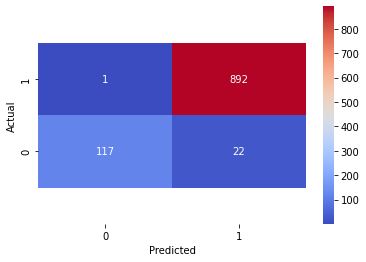

True negative:  117  False positive:  22  False negative:  1  True positive:  892


In [13]:
modelRF = RandomForestClassifier(random_state=1)
modelRF.fit(X_train_features,Y_train)

# prediction on training data
prediction_on_training_dataRF = modelRF.predict(X_train_features.toarray())
accuracy_on_training_dataRF = accuracy_score(Y_train, prediction_on_training_dataRF)
print('Random Forest: Accuracy on training data : ' , accuracy_on_training_dataRF)

# prediction on test data
prediction_on_test_dataRF = modelRF.predict(X_test_features.toarray())
accuracy_on_test_dataRF = accuracy_score(Y_test, prediction_on_test_dataRF)
print('Random Forest: Accuracy on test data : ' , accuracy_on_test_dataRF)

# f1 score
f1_scoreRF = f1_score(Y_test, prediction_on_test_dataRF)
print('Random Forest: F1 score : ' , f1_scoreRF)


#confusion matrix
cm = confusion_matrix(Y_test, prediction_on_test_dataRF)
tn, fp, fn, tp = cm.ravel()
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
bottom, top = ax.get_ylim()
ax.set_ylim(top - 0.5, bottom + 0.5)
plt.show()

print("True negative: ", tn, " False positive: ", fp, " False negative: ", fn, " True positive: ", tp)


Random Forest comment: High accuracy on training data, definitely overfitting

***
### Conclusion
#### Based on the database used and and out of the four algorithms compared, I would recomment using <b>Logistic Regression</b> because of high accuracy both on training and testing and  also f1 score.
#### 
***


<b>References and materials used and or ispired by:</b>

Lectures provided by Huddersfield University - AI Skills Bootcamp - [S.M. Riazul Islam, PhD](http://www.riazulislam.com/)

[Kaggle notebook - Moroviannn](https://www.kaggle.com/code/moraviann/sms-spam-filter-with-machine-learning)

[Towards data science article - gannestweb](https://towardsdatascience.com/email-spam-detection-1-2-b0e06a5c0472)

[Enjoy algotirhms blog - Ravish Raj](https://www.enjoyalgorithms.com/blog/email-spam-and-non-spam-filtering-using-machine-learning)

[Youtube tutorial - Siddhardhan](https://www.youtube.com/watch?v=rxkGItX5gGE )

[Kaggle notebook - AARUSHI JAIN](https://www.kaggle.com/code/aarushi211/gmail-spam-detection-with-nlp#Logistic-Regression)

[Kaggle notebook - MAYUR MOUNDEKAR](https://www.kaggle.com/code/mayurmoundekar/email-spam-detection)

[Kaggle notebook - SHUBHAM SINGH](https://www.kaggle.com/code/shubhamksingh/create-beautiful-notebooks-formatting-tutorial)

[Stack overflow - e numebrs issue](https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor)

[Linux hint - matrix colours](https://linuxhint.com/seaborn-heatmap-colors/)